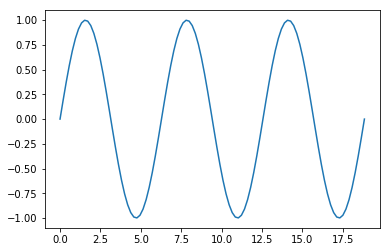

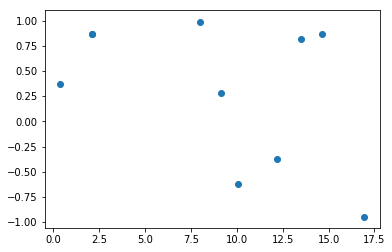

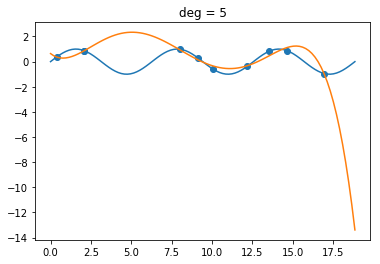

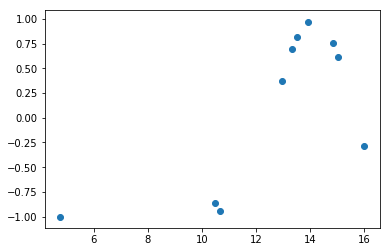

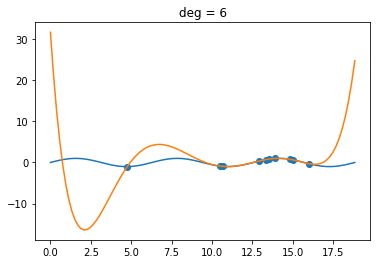

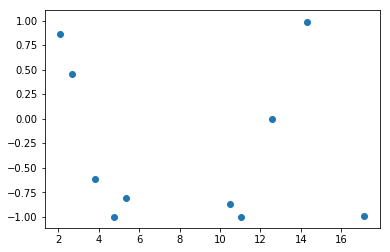

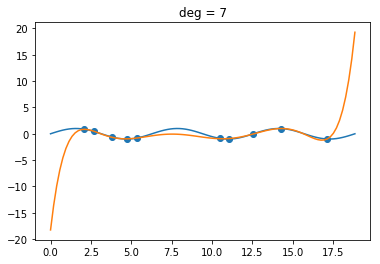

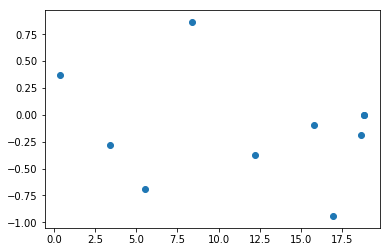

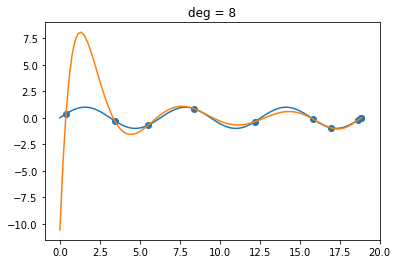

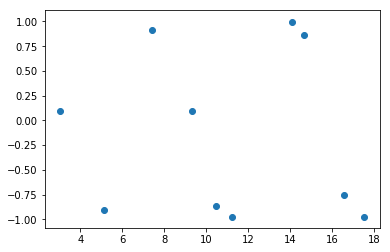

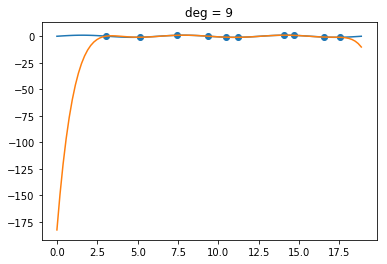

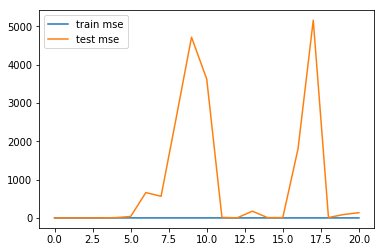

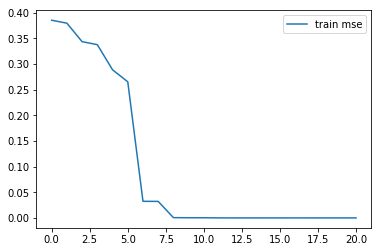

# 1_D Code 

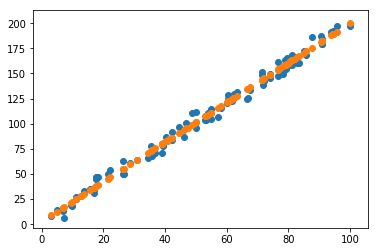

the r-squared is: 0.9911838202977805


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('data_1d.csv',header=None)
X=data.iloc[:,0]
Y=data.iloc[:,1]
# data.head(n=10)
plt.scatter(data.iloc[:,0],data.iloc[:,1])
# data.shape
# plt.show()
deno=X.dot(X)-X.mean()*X.sum()
a=(X.dot(Y)-Y.mean()*X.sum())/deno
b=( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) )/deno
Yhat=a*X+b
plt.scatter(X,Yhat)
plt.show()

d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)

# overfit 

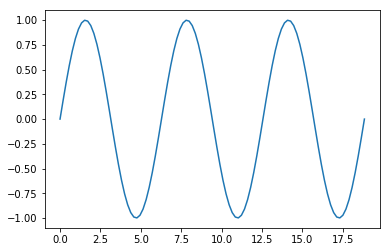

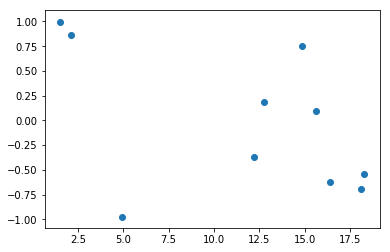

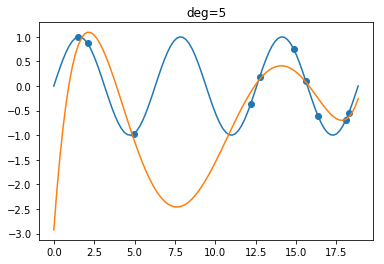

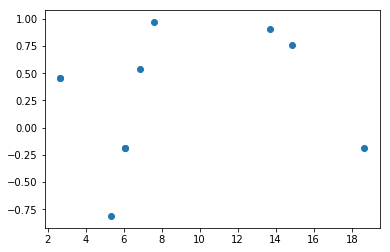

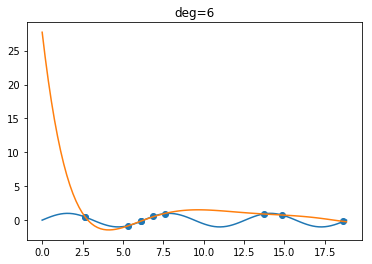

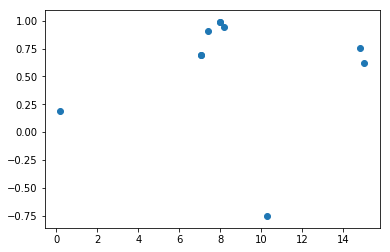

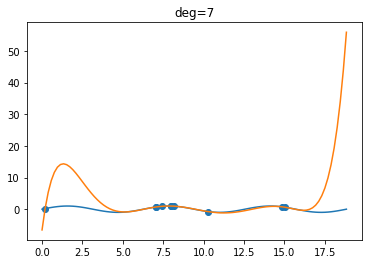

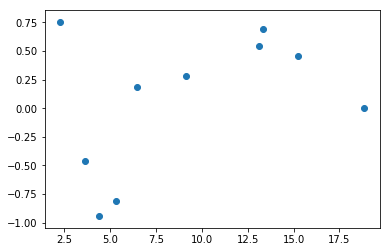

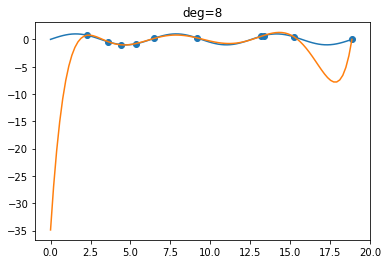

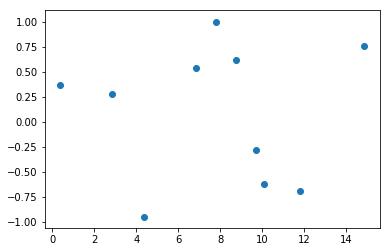

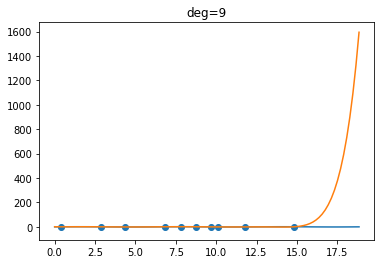

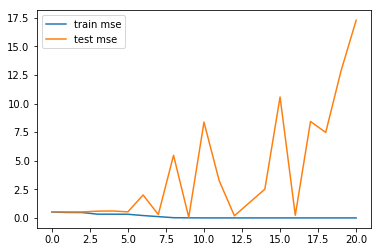

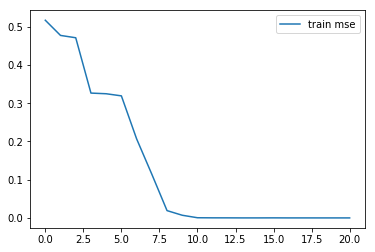

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def poly(X,deg):
    n=len(X)
    data=[np.ones(n)]
    for d in range(deg):
        data.append(X**(d+1))
    return np.vstack(data).T

def fit(X,Y):
    return np.linalg.solve(np.dot(X.T,X), np.dot(X.T,Y))

    
# a=np.random.random(15)
# temp=poly(a,3)
# temp
# temp.shape

def fit_and_display(X,Y,sample,deg):
    N=len(X)
    train_idx=np.random.choice(N,sample)
    Xtrain=X[train_idx]
    Ytain=Y[train_idx]
    plt.scatter(Xtrain,Ytain)
    plt.show()
    
    
    Xtrain_poly=poly(Xtrain,deg)
    w=fit(Xtrain_poly,Ytain)
    
    
    x_poly=poly(X,deg)
    Yhat=x_poly.dot(w)
    plt.plot(X,Y)
    plt.plot(X,Yhat)
    plt.scatter(Xtrain,Ytain)
    plt.title("deg=%d"%deg)
    plt.show()
        
    
def plot_train_vs_test_curve(X,Y,sample=20,max_deg=20):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]
    test_idx=[idx for idx in range(N) if idx not in train_idx]
    Xtest = X[test_idx]
    Ytest = Y[test_idx]
    
    
    mse_trains = []
    mse_tests = []
    
    for deg in range(max_deg+1):
        Xtrain_poly = poly(Xtrain, deg)
        w = fit(Xtrain_poly, Ytrain)
        Yhat_train = Xtrain_poly.dot(w)
        mse_train = get_mse(Ytrain, Yhat_train)
        Xtest_poly = poly(Xtest, deg)
        Yhat_test = Xtest_poly.dot(w)
        mse_test = get_mse(Ytest, Yhat_test)

        mse_trains.append(mse_train)
        mse_tests.append(mse_test)
        
    plt.plot(mse_trains, label="train mse")
    plt.plot(mse_tests, label="test mse")
    plt.legend()
    plt.show()

    plt.plot(mse_trains, label="train mse")
    plt.legend()
    plt.show()

    
def get_mse(Y, Yhat):
    d = Y - Yhat
    return d.dot(d) / len(d)


if __name__=="__main__":
    N=100
    X=np.linspace(0,6*np.pi,N)
    Y=np.sin(X)
    
    plt.plot(X,Y)
    plt.show()
    
    for d in (5,6,7,8,9):
        fit_and_display(X,Y,10,d)
    plot_train_vs_test_curve(X,Y)
    

# Moore 

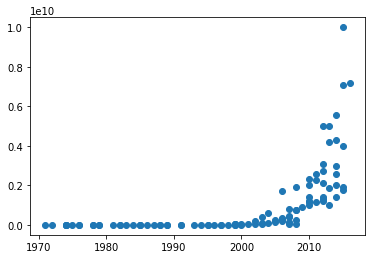

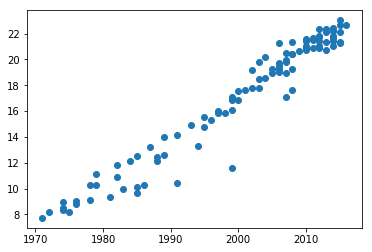

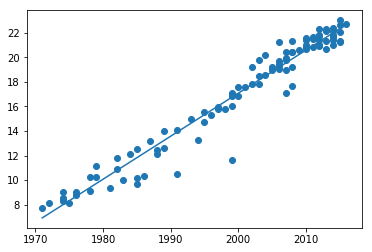

a: 0.3510435733650199 b: -685.000284381709
the r-squared is: 0.952944285228576
time to double: 1.9745331723797188 years


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# data=pd.read_csv('moore.csv')
# data.head(n=15)
import re
import numpy as np
non_decimal=re.compile(r'[^\d]+')
X=[]
Y=[]
with open('moore.csv') as m:
    for line in m:
        r=line.split('\t')
        x=int(non_decimal.sub('',r[2].split('[')[0]))
        y=int(non_decimal.sub('',r[1].split('[')[0]))
        X.append(x)
        Y.append(y)
#         x=int(non_decimal('',r[2].split('[')[0]))
X=np.array(X)
Y=np.array(Y)

plt.scatter(X, Y)
plt.show()


Y = np.log(Y)
plt.scatter(X, Y)
plt.show()


denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

# let's calculate the predicted Y
Yhat = a*X + b

plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("a:", a, "b:", b)
print("the r-squared is:", r2)

# how long does it take to double?
# log(transistorcount) = a*year + b
# transistorcount = exp(b) * exp(a*year)
# 2*transistorcount = 2 * exp(b) * exp(a*year) = exp(ln(2)) * exp(b) * exp(a * year) = exp(b) * exp(a * year + ln(2))
# a*year2 = a*year1 + ln2
# year2 = year1 + ln2/a
print("time to double:", np.log(2)/a, "years")

#         print(x)

# 2D Lineaer Regrassion

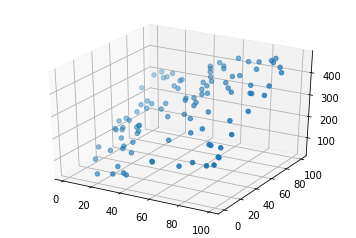

0.9980040612475777


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
data=pd.read_csv('data_2d.csv',header=None).as_matrix()
# data.head(n=15)
X,Y=data[:,:2],data[:,-1]
X=np.concatenate((X,np.array([len(X)*[1]]).T),axis=1)

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()


w=np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))
Yhat=np.dot(X,w)

d1=Y-Yhat
d2=Y-Y.mean()
r1=1-d1.dot(d1)/d2.dot(d2)

print(r1)

# poly 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('data_poly.csv',header=None).as_matrix()
X,Y=data[:,0],data[:,1]
X=np.array([[1,x,x*x] for x in X])
plt.scatter(X[:,1],Y)
plt.show()

w=np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))
Yhat = np.dot(X,w)

d1=Y-Yhat
d2=Y-Y.mean()
R=1-d1.dot(d1)/d2.dot(d2)
print(R)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline

data=pd.read_excel('mlr02.xls')
X=data.as_matrix()
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[:,2],X[:,1])
plt.show()



# L2 regularization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=50
D=2

X=np.linspace(0,10,50)
Y=.5*X+np.random.randn(N)
Y[-1]+=30
Y[-2]+=30
plt.scatter(X,Y)
# plt.show()
X=np.vstack(([np.ones(N)],X)).T
w_ml=np.linalg.solve(X.T.dot(X),X.T.dot(Y))
# w_ml
Yhat=X.dot(w_ml)
plt.plot(X[:,1],Yhat)
plt.show()


l2=1000.0
w_map=np.linalg.solve(l2*np.eye(D)+X.T.dot(X),X.T.dot(Y))
Yhat_map=X.dot(w_map)
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],Yhat_map,label='max_likelyhood')
plt.plot(X[:,1],Yhat, label='map')
plt.legend()
plt.show()

# gradient descent 

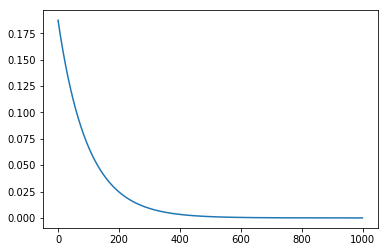

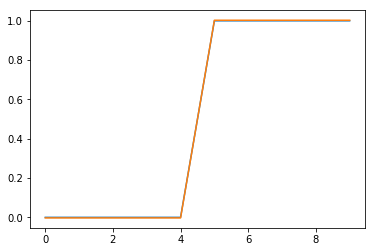

In [9]:
import numpy as np
import matplotlib.pyplot as plt
D=3
N=10
X=np.zeros((N,3))
X[:,0]=1
X[:5,1]=1
X[5:,2]=1
costs=[]
Y=np.array(5*[0]+5*[1])
# w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
w=np.random.randn(D)/np.sqrt(D)
learning_rate=1e-3
for i in range(1000):
    Yhat=X.dot(w)
    delta=Yhat-Y
    w=w-learning_rate*X.T.dot(delta)
    
    mse=delta.dot(delta)/N
    costs.append(mse)
plt.plot(costs)
plt.show()
Yhat=X.dot(w)
plt.plot(Y,label='label')
plt.plot(Yhat,label='prediction')
plt.show()

# l1 regularization


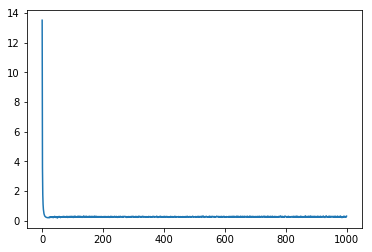

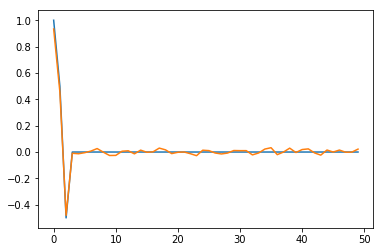

In [10]:
import numpy as np
import matplotlib.pyplot as plt


N=50
D=50

X=(np.random.random((N,D))-.5)*10
# plt.scatter(X[:,0],X[:,1])
# plt.show()

true_w=np.array([1,.5,-.5]+[0]*(D-3))
Y=X.dot(true_w)+np.random.randn(N)*.5


costs=[]

# w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
w=np.random.randn(D)/np.sqrt(D)
learning_rate=1e-3
l1=10.0
for i in range(1000):
    Yhat=X.dot(w)
    delta=Yhat-Y
    w=w-learning_rate*(X.T.dot(delta)+l1*np.sign(w))
    
    mse=delta.dot(delta)/N
    costs.append(mse)
plt.plot(costs)
plt.show()
Yhat=X.dot(w)
plt.plot(true_w,label='trew_w')
plt.plot(w,label='map')
plt.show()

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_excel('mlr02.xls')
X = df.as_matrix()


plt.scatter(X[:,1] , X[:,0])
plt.show()


plt.scatter(X[:,2] , X[:,0])
plt.show()